## **05 데이터 전처리**

**데이터 전처리(Data Preprocessing)는 ML 알고리즘만큼 중요하다.**

**ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있다.(Garbage In, Garbage out)**

**사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항**

**1. 결손값, 즉 NaN, Null 값은 허용되지 않는다. 따라서 이러한 Null 값은 고정된 다른 값으로 변환해야 한다.**

> **피처 값 중 Null값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대체할 수 있다.**

> **하지만 Null값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 더 좋다.**

> **가장 결정이 힘든 부분이 Null 값이 일정 수준을 정하는 기준은 없고 하지만 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 업무 조직등을 상세히 검토해 더 정밀한 대체 값을 선정해야 한다.**

**2. 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다.**

> **따라서 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 한다.**

> **문자열 피처는 주로 범주형 자료나 텍스트형 피처를 의미한다.**

> **텍스트형 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제하는 게 좋다.**

### **데이터 인코딩**

**머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label encoding)과 원-핫 인코딩(One Hot encoding)이 있다.**

> **레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다.**

> **원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다.**

#### **레이블 인코딩**

**사이킷런의 레이블 인코딩(Label encoding)은 LabelEncoder 클래스로 구현한다.**

**LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행한다.**

In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

In [3]:
# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행

encoder = LabelEncoder()

In [4]:
# fit()으로 변환을 위한 사전 구조를 맞추고,
encoder.fit(items)
# transform으로 맞춘 구조를 변환하여 labels 변수에 할당한다.
labels = encoder.transform(items)
# TV = 0, 냉장고 = 1, 전자레인지 = 4, 컴퓨터 = 5, 선풍기 = 3, 믹서 = 2로 변환
print('인코딩 변환:',labels)

인코딩 변환: [0 1 4 5 3 3 2 2]


**데이터가 작아서 문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알 수 있지만, 많은 경우에 이를 알지 못한다. 이 경우에는 LabelEncoder 객체의 classes_ 속성값으로 확인하면 된다.**

In [5]:
# 문자열 값이 어떤 숫자 값으로 인코딩 되었는지 encoder.classes_로 확인
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [6]:
# inverse_transform()을 통해 인코딩된 값을 다시 디코딩할 수 있다.
print('디코딩 원본 값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


**레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다.**

**하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있다.**

> **이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문이다. 즉, 냉장고가 1, 믹서가 2로 변환되면, 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생한다.**

> **하지만 냉장고와 믹서의 숫자 변환 값은 단순 코드지 숫자 값에 따른 순서나 중요도로 인식돼서는 안 된다.**

**이러한 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML 알고리즘에는 적용하지 않아야 한다.**

**트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별문제가 없다.**

#### **원-핫 인코딩(One-Hot Encoding)**

**원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다.**

> **즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는컬럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.**

> **예를 들어 0 ~ 5 까지의 6개의 상품 분류를 한다고 가정했을 때 고유 값에 따라 상품 분류 피처를 6개의 상 상품 분류 고유 값 피처로 변환한다.**

**즉, 해당 고유 값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력하며, 이러한 특성으로 원-핫 인코딩으로 명명하게 됐다.**

**원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 쉽게 변환이 가능하다.**

> **단, 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다는 것이며,**

> **입력 값으로 2차원 데이터가 필요하다는 점이다.**

In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [8]:
items = ['TV', '냉장고', '전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

In [9]:
# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환한다.
encoder = LabelEncoder()

In [10]:
encoder.fit(items)
labels = encoder.transform(items)

In [11]:
# 2차원 데이터로 변환한다.
labels = labels.reshape(-1,1)

In [12]:
# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()

In [13]:
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:
print('원-핫 인코딩 데이터')
print(oh_labels.toarray()) # oh_labels를 array 형태로 출력
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape) # oh_labels의 데이터 차원

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


**판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있다. get_dummies()를 이용하면 된다.**

> **사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환할 수 있다.**

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})

In [17]:
# get_dummies()를 이용하면 숫자형 값으로 변환 없이도 바로 변환이 가능함을 알 수 있다.
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### **더미변수(Dummy variable)**

**더미변수: 더미변수는 범주형 변수를 연속형 변수로 변환하는 것인데, 정확히 따지자면 연속형 변수 '스럽게' 만든 것이다.**


> **연속형 변수: 숫자로 이루어져 있으며, 끊기는 부분 없이 연속적으로 값을 가질 수 있다.**

> **범주형 변수: 문자 또는 숫자로 이루어져 있으며, 범주(카테고리)가 있다.**

**더미변수를 만드는 이유: 범주형 변수로는 사용할 수 없고 연속형 변수로만 가능한 분석기법을 사용할 수 있게 해준다.**

> **예를 들어 선형 회귀분석, 로지스틱 회귀분석 등 회귀분석 계열은 원래 설명변수가 연속형 변수여야지 사용할 수 있는 분석 기법이다.**

> **하지만 만약 설명변수 중에 범주형 변수가 섞여 있다면, 그 변수를 더미변수로 변환 즉, 연속형 변수스럽게 만들어서 회귀분석을 사용할 수 있다.**

**더미변수의 특징**

> **더미변수는 0 또는 1의 값을 가진다. 즉, 해당 더미변수에 속하면 1 아니면 0의 값을 가진다.(기준이 되는 범주는 값이 0이 된다.)**

> **더미변수는 원래 범주형 변수의 범주 개수보다 1개 적게 만들어진다.**

**더미변수를 만드는 법**

> ![test](./img/더미변수.png)

> **예를 들어 위와 같은 데이터가 있고 장르를 구분하는 로지스틱 회귀분석을 하기 위해 '남주인공역 연예인의 본업', '시간대', '장르'인 변수를 더미변수로 변환하고자 한다.**

**1. 범주형 변수의 범주 중 기분이 되는 값을 정한다.**

> **기준이 되는 값은 보통 일반적이거나 빈도수가 많은 범주로 선택한다.**

> **위 예에서 '남주인공 역 연예인의 본업'에서 배우를 기준 범주로 삼고, 시간대에서는 오후로 기준을 삼는다.**

**2. 기준이 되는 변수를 제외하고 더미변수를 만든다.**

> **아래 그림 처럼 <배우>와 <오후> 범주를 제외하고 더미변수를 만든다.**

> ![test](./img/더미변수1.png)

**더미변수의 의미**

> **더미변수는 회귀식에서 해당 변수의 효과를 0 또는 상수값으로 만들어 준다. 아래 그림을 보면 더 잘 이해가 갈 것이다.**

> ![test](./img/더미변수3.png)

> **원래 회귀식에서 x2가 1이면 b만 남아서 y 절편은 b+c가 된다.**

> **원래 회귀식에서 x2가 0이면 b도 0이 되어서 y절편은 c가 된다.**

> **이처럼 더미변수는 회귀 기울기를 바꾸지는 않고 절편만을 바꾸어 평행하게 움지이게 하는 역할을 한다.**

> **예를 들어 x2가 <시간대_오전>라면 x2가 0(오후)일 때보다 x2가 1 (오전)일때 b만큼의 효과가 y에 더해지게 된다는 의미이다.**

**회귀분석에서 P개의 개별 수준을 갖는 요인변수는 보통 P-1개의  열을 갖는 행렬로 표시된다.**

> **회귀모형에 일반적으로 절편이 포함되기 때문이다.**

> **절편이 있기 때문에 P-1개의 이진변수의 값을 정의하고 나며, P번째 값을 알 수 있고, 따라서 P번째 값까지 넣게 되면 이러한 중복성이 문제가 될 수 있다.**

> **다시 말해, P번째 열을 추가하면 다중공선성 오류가 발생할 수 있다.**

**머신러닝 커뮤니티에서는 이런 식의 표현법을 원-핫 인코딩이라 부른다.**

> **최근접 이웃 알고리즘이나 트리 모델 같은 머신러닝 알고리즘에서, 요인변수를 표현하는 데 원-핫 인코딩을 많이 사용한다.**

### **표준편차 vs 표준오차**

**평균은 집단의 수치에서 중앙값을 나타냅니다. 그런데 평균만으로는 집단의 수치가 어떤 형태로 분포하고 있는지 측정할 수가 없습니다. 넓게 퍼져 있는 집단과 평균에 근접해 있는 집단의 평균이 같을 수 있으니까요. 이 두 집단에서 측정된 값들이 평균에서 떨어져 있는 정도를 알아내기 위한 것이 “표준편차”입니다.**

> ![test](./img/표준편차.jpg)

**우리가 통계를 낼 때 모집단(전체개수) 에서 표본을 뽑아 계산에 이용하는데, 그것을 “표본집단” 이라고 합니다. 이런 표본집단을 모집단에서 여러 개 추출하는 것입니다. 이런 표본집단 간의 편차가 “표본오차”인 것입니다.**

> ![test](./img/표준오차1.jpg)

**일반적으로 우리는 (표본통계량으로) 어떤 것을 측정하거나 (통계 또는 머신러닝 모델로) 뭔가를 모델링하기 위해 표본을 뽑는다.**

**따라서 우리가 다른 표본을 뽑았다면 결과가 다를 수 있는데 그것이 얼마나 달라질지에 관심이 있다.**

  > **주요 관심사는 표본의 변동성이다.**
  
  > **데이터의 분포는 어떤 데이터 집합에서 각 개별 값의 도수분포를 의미하고 표본분포는 여러 표본들 혹은 재표본들로부터 얻은 표본 통계량의 도수분포를 의미한다. 용어혼동에 주의**

**평균과 같은 표본통계량의 분포는 데이터 자체의 분포보다 규칙이고 종 모양일 가능성이 높다.**

  > **통계의 기반이 되는 표본이 클수록, 그럴 가능성이 높은 것이 사실이다. 또한 표본이 클수록 표본통계량의 분포가 좁아진다.**

### **피처 스케일링과 정규화**

**서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다.**

> **대표적인 방법으로 표준화(Standardization)와 정규화(Normalization)가 있다.**

**표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안정규 분포를 가진 값으로 변환하는 것을 의미한다.**

![test](./img/표준화.png)

**일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다.**

> **예를 들어 피처 A는 거리를 나타내는변수로서 값이 0 ~ 100km로 주어지고 피처 B는 금액을 나타내는 속성으로 값이 0 ~ 100,000,000,000원으로 주어진다면 이 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1의 값으로 변환 하는 것이다.**

> **즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것이다.**

![test](./img/정규화.jpg)

### **StandardScaler**

**StandardScaler는 앞에서 설명한 표준화를 쉽게 지원하기 위한 클래스이다. 즉, 개별 피처를 평균이 0이고, 분산이 1인 값을 변환해준다.**

> **이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것은 몇몇 알고리즘에서 매우 중요하다.**

> **특히 사이킷런에서 구현한 RBF 커널을 이용하는 SVM(서포트 벡터 머신)이나 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다.**

In [18]:
from sklearn.datasets import load_iris
import pandas as pd

In [19]:
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환한다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)

In [20]:
print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [21]:
# StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환한다.
# StandardScaler 객체를 생성한 후에 fit()과 transform()메서드에 변환 대상 피처 데이터 세트를 
# 입력하고 호출하면 간단하게 변환된다.
# transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 
# 이를 DataFrame으로 변환해 평균과 분산 값을 다시 확인한다.
from sklearn.preprocessing import StandardScaler

In [22]:
# StandardScaler 객체 생성
scaler = StandardScaler()

In [23]:
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

In [24]:
# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
# 모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됐다.
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### **MinMaxScaler**

**MinMaxScaler는 데이터 값을 0과 1사이의 범위 값으로 변환한다(음수 값이 있으면 -1에서 1 값으로 변환한다).**

> **데이터의 분포가 가우시안 분포가 아닐 경우에 MinMaxScaler를 적용해 볼 수 있다.**

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

In [27]:
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

In [28]:
# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 변환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled,columns=iris.feature_names)

In [29]:
# 모든 피처에 0에서 1사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있다.
print('featrue들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

featrue들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


**파이썬 기반에서 머신러닝을 수행하기 위한 다양한 요소를 살펴봤다. 데이터 분석가나 데이터 과학자로서의 역량을 증대하기 위해서는 머신러닝 알고리즘이나 이들 API에 대한 사용법 못지않게 데이터 분석에 대한 감을 강화하는 것이 중요하다.**

**이러한 데이터 능력을 향상시키는 가장 좋은 방법은 많은 데이터 분석 작업을 스스로 수행해 보는 것이다.**

**벽에 부딪힐 때마다 포기하지 않고 다양한 방법을 실전에 적용해 가면서 자신만의 데이터 분석에 대한 감을 쌓아 나가면 그 길에 도달할 수 있다.**

### **06 사이킷런으로 수행하는 타이타닉 생존자 예측**

**탑승자 데이터**

> **Passengerid: 탑승자 데이터 일련번호**

> **survived: 생존 여부, 0 = 사망, 1 = 생존**

> **pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석**

> **sex: 탑승자 성별**

> **Age: 탑승자 나이**

> **sibsp: 같이 탑승한 형제자매 또는 배우자 인원수**

> **parch: 같이 탑승한 부모님 또는 어린이 인원수**

> **ticket: 티겟 번호**

> **fare: 요금**

> **cabin: 선실 번호**

> **embarked: 중간 정착 항구 C = Cherbourg, Q = Qeenstown, S = Southampton**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
# 데이터 불러오기
titanic_df = pd.read_csv('./train.csv')

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# 데이터 칼럼 타입 확인
# RangeIndex는 DataFrame 인덱스의 범위를 나타내므로 전체 로우 수를 알 수 있다.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
# Age 변수의 결측값을 평균값으로 대체
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace = True)
# Cabin과 Embarked의 결측값을 N으로 대체
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [35]:
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
# Cabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않았다.
# Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보인다.
# 왜냐하면 이 시절에는 지금보다도 부자와 가난한 사람에 대한 차별이 더 있던 시절이기 때문에
# 등급별 생존율이 차이가 있을것으로 판단되기 때문이다.
print('\n Cabin 값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embark 값 분포:\n',titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
C49              1
D46              1
B37              1
E46              1
C111             1
Name: Cabin, Length: 148, dtype: int64

 Embark 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [36]:
# Cabin 속성의 경우 앞 문자만 추출한다.
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [37]:
# 머신러닝 알고리즘을 적용해 예측을 수행하기 전에 데이터를 먼저 탐색해본다.
# 첫 번쨰로 어떤 유형의 승객이 생존 확률이 높았는지 확인해 보겠다.
# 영화 타이타닉에서 보았듯이 바다에서 사고가 날 경우 여성과 아이들, 그리고 노약자가 
# 가장 먼저 구조 대상이다. 그리고 아마도 부자나 유명인이 다음 구조 대상이었을 것이다.
# 안타깝게도 삼들실에 탄 많은 가난한 이는 타이타닉호와 운명을 함께 했을 것이다.
# 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해본다.
# 성별과 생존 클래스를 기준으로 생존자가 몇명인지 groupby를 통해 출력한다.
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

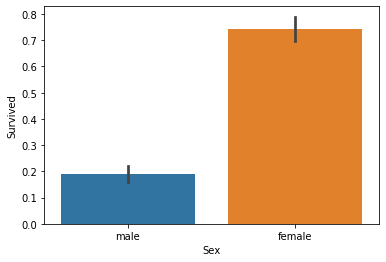

In [38]:
# 시본은 기본적으로 맷플롯립에 기반하고 있지만, 좀 더 세련된 비주얼과 쉬운 API,
# 편리한 판다스 DataFrame과 연동 등으로 데이터 분석을 위한 시각화로 자주 사용되는 패키지이다.
sns.barplot(x = 'Sex', y = 'Survived',data=titanic_df)

**탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많다. 여자는 314명 중 233명으로 약 74.2%가생존했지만, 남자의 경우 577명 중 468명이 죽고 109명만 살아남아 약 18.8%가 생존했다.**

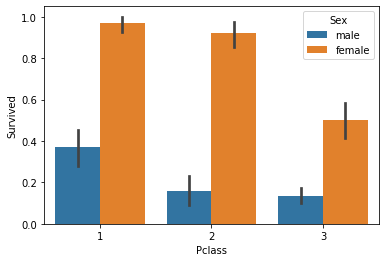

In [39]:
# 부자와 가난한 사람 간의 생존 확률은 어떨까? 부를 측정할 수 있는 속성으로 적당한 것은 객실 등급이다.
# 단순히 객실 등급별로 생존 확률을 보는 것보다는 성별을 함께 고려해 분석하는 것이 더 효율적
# 객실 등급 별(x) 성별에 따른(hue) 생존 확률(y)을 표현 
sns.barplot(x = 'Pclass', y = 'Survived', hue= 'Sex', data=titanic_df)

**여성의 경우 일, 이등식에 따른 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐을 알 수 있다.**

**남성의 경우 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높다.**

In [40]:
# Age에 따른 생존 확률을 알아본다.
# Age의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당한다.

# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'UnKnown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 26: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

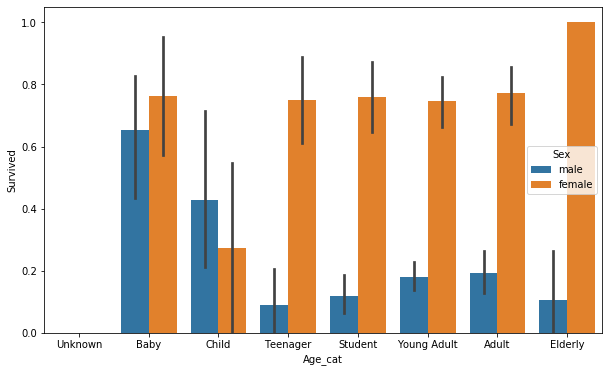

In [41]:
# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(x)는 입력 값으로 'Age' 칼럼 값을 받아서 해당하는 cat반환
# order 함수는 group_names 처럼 출력을 순차적으로 지정하기 위한 파라미터
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

**여자 Baby의 경우 비교적 생존 확률이 높다. 아쉽게도 여자 Child의 경우는 다른 연령대에 비해 생존 확률이 낮다. 그리고 여자 Senior의 경우는 매우 생존 확률이 높았다.**

**이제까지 분석한 결과 Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피처임을 어느 정도 확인할 수 있다.**

In [42]:
# 이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하겠다.
from sklearn import preprocessing

In [43]:
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

In [44]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


**Sex, Cabin, Embarked 속성이 숫자형으로 바뀐 것을 알 수 있다.**

In [45]:
# 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 한다.

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_feature(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_feature(df)
    return df

In [46]:
# 데이터 전처리를 수행하는 transform_features() 함수를 만들었으니 이 함수를 이용해 
# 다시 원본 데이터를 가공해 본다.
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived'] # label만 추출
X_titanic_df = titanic_df.drop('Survived',axis=1) # label을 제외

In [47]:
X_titanic_df = transform_features(X_titanic_df)

In [48]:
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [49]:
# 내려받은 학습 데이터 세트를 기반으로 해서 train_test_split()을 이용해 별도의 테스트 셋 추출
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

In [51]:
# ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측
# 예측 성능 평가는 정확도로 할 것이며 이를 위해 accuracy_score() API를 사용한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
# 결정트리 ,Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [53]:
# 결정트리 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리 정확도:{:.4f}'.format(accuracy_score(y_test,dt_pred)))

결정트리 정확도:0.7877


In [54]:
# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트 정확도:{:.4f}'.format(accuracy_score(y_test,rf_pred)))

랜덤포레스트 정확도:0.8324


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 회귀 정확도:{:.4f}'.format(accuracy_score(y_test,lr_pred)))

로지스틱 회귀 정확도:0.8659


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**3개의 알고리즘 중 로지스틱회귀가 타 알고리즘에 비해 높은 정확도를 나타내고 있다. 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없다.**

In [56]:
# 교차 검증으로 결정 트리 모델을 평가한다.
# 앞에서 언급한 교차 검증을 위한 KFold, cross_val_score(), GridSearchCV를 모두 사용
from sklearn.model_selection import KFold

In [65]:
def exec_kflod(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        # folds=5에 맞춰서 train, test의 인덱스가 할당
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        # score의 빈 리스트에 추카
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count,accuracy))
        # 5개 fold에서의 평균 정확도 계산
        mean_score = np.mean(scores)
        print('평균 정확도: {0:.4f}'.format(mean_score))

In [66]:
# exec_kfold 호출
# 평균 정확도는 약 78.23%이다. 
exec_kflod(dt_clf,folds=5)

교차 검증 0 정확도: 0.7542
평균 정확도: 0.7542
교차 검증 1 정확도: 0.7809
평균 정확도: 0.7675
교차 검증 2 정확도: 0.7865
평균 정확도: 0.7739
교차 검증 3 정확도: 0.7697
평균 정확도: 0.7728
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [69]:
# 이번에는 교차 검증을 cross_val_score() API를 이용해 수행한다.
from sklearn.model_selection import cross_val_score

In [70]:
# cross_val_score()와 방금 전 K 폴드의 평균 정확도가 약간 다른데, 이는 cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다.
scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count,accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7765
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8418
평균 정확도: 0.7835


**마지막으로 GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정해 본다.**

**CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능을 측정한다.**

**최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도를 출력**

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameters = {'max_depth': [2,3,4,5,10],
             'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

In [73]:
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=11,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         '

In [74]:
print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992


In [75]:
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator 예측 및 평가 수행
dprediction = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dprediction)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


**최적화된 하이퍼 파라미터인 max_depth=3, min_samples_leaf=1, min_samples_split=2로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상됐다.**

**일반적으로 하이퍼 파라미터 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵다. 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보인다.**